<a href="https://colab.research.google.com/github/Real1CM/ComputerVison/blob/main/2024_10_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### 1. 对彩色图像重复本课程的代码，计算图像的sobel算子的结果，并使用canny算子提取图像边缘

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


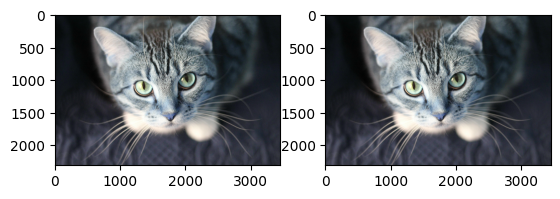

In [3]:
img = cv2.imread('./cat.jpg')

kernel = np.ones((5, 5))
kernel = kernel * 1 / kernel.sum()
print(kernel)
img_filter = cv2.filter2D(img, -1, kernel)

plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(img_filter, 'gray')

In [4]:
kernel_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

print(kernel_sobel_x)
print(kernel_sobel_y)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


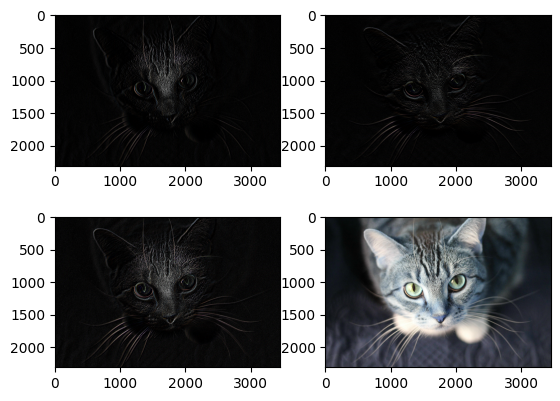

In [8]:
diff_x = cv2.filter2D(img, -1, kernel_sobel_x)
diff_y = cv2.filter2D(img, -1, kernel_sobel_y)
gradient = np.fabs(diff_x) + np.fabs(diff_y)

diff_x = diff_x.astype(np.uint8)
diff_y = diff_y.astype(np.uint8)
gradient = gradient.astype(np.uint8)

plt.subplot(2, 2, 1)
plt.imshow(diff_x, 'gray')
plt.subplot(2, 2, 2)
plt.imshow(diff_y, 'gray')
plt.subplot(2, 2, 3)
plt.imshow(gradient, 'gray')
plt.subplot(2, 2, 4)
plt.imshow(img, 'gray')

(2304, 3456)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


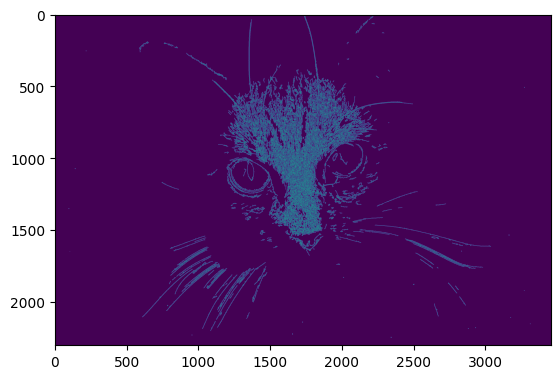

In [10]:
t_lower = 50
t_upper = 150
edge = cv2.Canny(img, t_lower, t_upper)

print(edge.shape)
print(edge)
plt.imshow(edge)

####### 2. 使用opencv内置sobel算子计算图像梯度信息，并进行对比

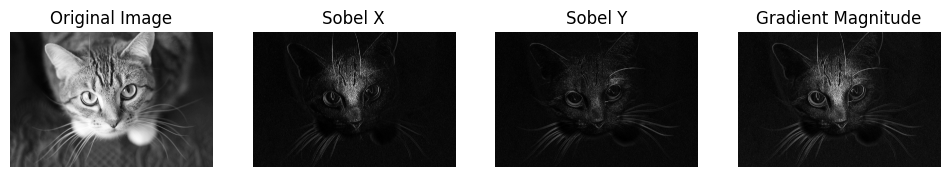

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./cat.jpg', cv2.IMREAD_GRAYSCALE)

sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = cv2.magnitude(sobelx, sobely)
sobelx_abs = cv2.convertScaleAbs(sobelx)
sobely_abs = cv2.convertScaleAbs(sobely)
gradient_magnitude_abs = cv2.convertScaleAbs(gradient_magnitude)

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(sobelx_abs, cmap='gray')
plt.title('Sobel X')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(sobely_abs, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(gradient_magnitude_abs, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.show()

